In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import os

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

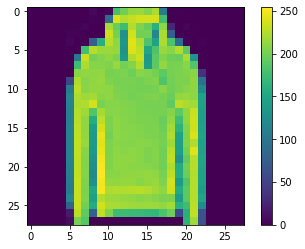

In [6]:
plt.figure()
plt.imshow(train_images[5687])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

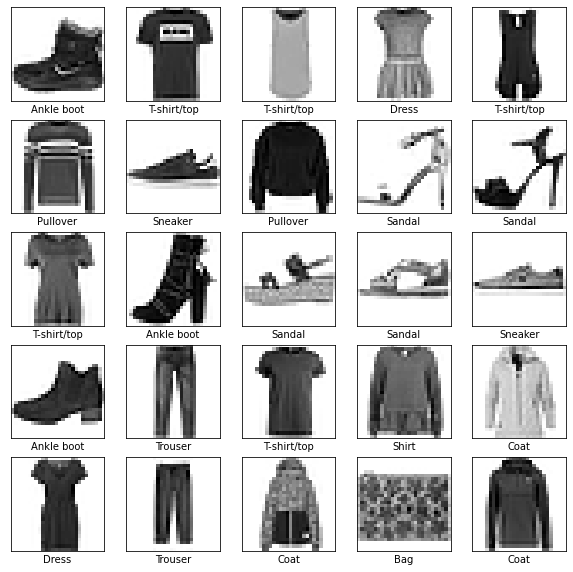

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 738us/step - loss: 0.5047 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 1s 735us/step - loss: 0.3793 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 1s 736us/step - loss: 0.3403 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 1s 709us/step - loss: 0.3165 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.2999 - accuracy: 0.8882
Epoch 6/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.2823 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 1s 798us/step - loss: 0.2709 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.2602 - accuracy: 0.9022
Epoch 9/10
1875/1875 [==============================] - 1s 722us/step - loss: 0.2495 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 1s 719u

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3292 - accuracy: 0.8843

Test accuracy: 0.8842999935150146


In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

In [15]:
predictions[0]

array([1.2411426e-06, 1.7581199e-09, 1.1102355e-09, 2.2342962e-07,
       1.2652617e-07, 7.1907812e-04, 7.2564069e-07, 3.1567894e-02,
       9.5083692e-07, 9.6770984e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

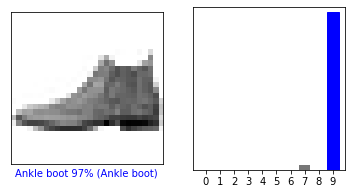

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

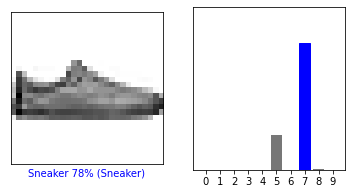

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

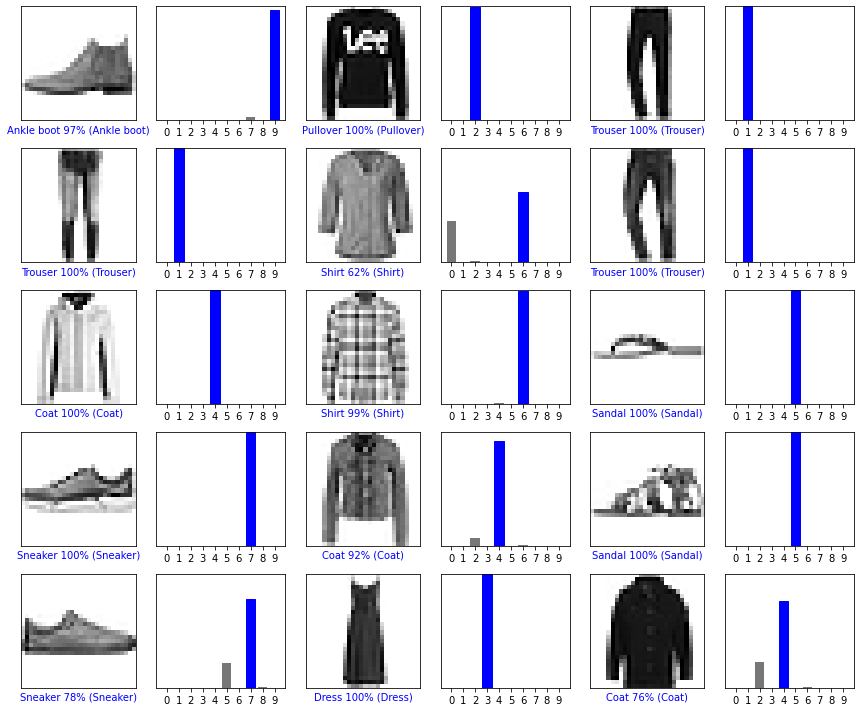

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
print(img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.05098039 0.2627451
  0.         0.         0.         0.         0.19607843 0.14901961
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.03137255 0.47058824 0.81960784 0.88627451 0.96862745
  0.92941176 1.         1.         1.         0.96862745 0.93333333
  0.92156863 0.6745098  0.28235294 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5372549  0.9372549  0.98823529 0.95294118 0.91764706 0.89803922
  0.93333333 0.95686275 0.96470588 0.94117647 0.90196078 0.90980392
  0.9372549  0.97254902 0.98431373 0.76078431 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.4
  1.         0.90588235 0.89411

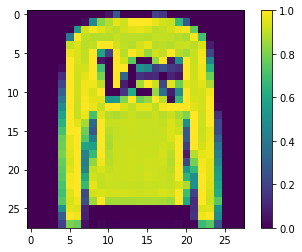

In [24]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.5914523e-05 5.5514603e-12 9.9582750e-01 3.1083314e-08 2.3019190e-03
  3.1894179e-13 1.8046349e-03 2.0858248e-15 3.4088921e-10 1.2093527e-09]]


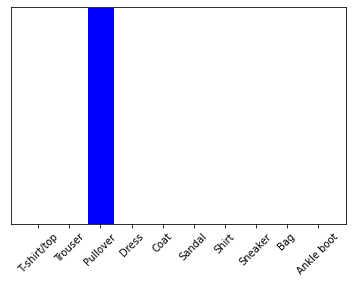

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

2

In [38]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [40]:
base_dir = (
    "../New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
            )
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "valid")

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="nearest",
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1 / 255.0)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
)

NameError: name 'batch_size' is not defined